## Parse CANT-HYD results

In [2]:
# env: py3

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from Bio import SeqIO

# sns style without grid
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("Set2")

wd_prj = "/Users/allen/github/rujinlong/phydgene"
os.chdir(wd_prj)

In [3]:
# function to extract trusted hits and good hits from CANT-HYD annotation
def extract_canthyd_hits(fin_canthyd_rst, df_canthyd_cutoffs):
    df_hmmer = pd.read_csv(fin_canthyd_rst, sep='\t', header=0)
    df = pd.merge(df_canthyd_cutoffs, df_hmmer, on='dbid', how='inner')
    df['trusted_hit'] = df['bitscore'] >= df['Trusted_Cutoff']
    df['good_hit'] = df['bitscore'] >= df['Noise_Cutoff']
    df_good = df[df['good_hit'] == True]
    df_trusted = df[df['trusted_hit'] == True]
    df_all = df
    return df_all.copy(), df_trusted.copy(), df_good.copy()


fin_canthyd_cutoffs = "/Users/allen/data/db/canthyd/cutoffs.tsv"
df_canthyd_cutoffs = pd.read_csv(fin_canthyd_cutoffs, sep='\t', header=0)

### D45 CANT-HYD annotation

In [4]:
fin_canthyd_d45 = os.path.join(wd_prj, "hpc/rst/D45/ap_D45_canthyd.tsv")
df_canthyd_d45_all, df_canthyd_d45_trusted, df_canthyd_d45_good = extract_canthyd_hits(fin_canthyd_d45, df_canthyd_cutoffs)

# sort df_canthyd_d45_all by bitscore in descending order, and then remove duplicated hits of the same query_id, but keep the first one
df_canthyd_d45_nr = df_canthyd_d45_all.sort_values(by=['bitscore'], ascending=False)
df_canthyd_d45_nr = df_canthyd_d45_nr.drop_duplicates(subset=['query_id'], keep='first')

In [5]:
# read bakta annotation
fin_gbk_d45_chr = os.path.join(wd_prj, "hpc/rst/D45/D45.tsv")
df_d45 = pd.read_csv(fin_gbk_d45_chr, sep='\t', header=2)
# rename "Locus Tag" to "query_id"
df_d45 = df_d45.rename(columns={'Locus Tag': 'query_id'})
# select columns ['query_id', 'Gene', 'Product']
df_d45 = df_d45[['query_id', 'Gene', 'Product']]

In [6]:
df_d45

,query_id,Gene,Product
0,NNKMIP_00005,NaN,hypothetical protein
1,NNKMIP_00010,dnaB,replicative DNA helicase
2,NNKMIP_00015,rplI,50S ribosomal protein L9
3,NNKMIP_00020,ssb,single-stranded DNA-binding protein
4,NNKMIP_00025,rpsF,30S ribosomal protein S6
...,...,...,...
3569,NNKMIP_17630,istA,IS21 family transposase
3570,NNKMIP_17635,NaN,IS30 family transposase
3571,NNKMIP_17640,NaN,IS3 family transposase
3572,NNKMIP_17645,NaN,Transposase


In [11]:
#df_canthyd_d45_nr

# bitscore > 50
df_canthyd_d45_nr_sel = df_canthyd_d45_nr[df_canthyd_d45_nr['bitscore'] > 50].copy()

# select columns ["query_id", "hmm_description", "Closest_false_positive", "Genes", "Broad_Enzymatic_Group", "Eenzyme", "dbid", "bitscore"]
df_canthyd_d45_nr_sel = df_canthyd_d45_nr_sel[["query_id", "hmm_description", "Closest_false_positive", "Genes", "Broad_Enzymatic_Group", "Eenzyme", "dbid", "bitscore"]]

# sort by query_id
df_canthyd_d45_nr_sel = df_canthyd_d45_nr_sel.sort_values(by=['query_id'], ascending=True)

In [12]:
df_canthyd_d45_nr_sel

,query_id,hmm_description,Closest_false_positive,Genes,Broad_Enzymatic_Group,Eenzyme,dbid,bitscore
38,NNKMIP_00450,alkane oxidizing cytochrome P450,Cytochromes,cyp153,43 - monooxygenase,Cytochrome P450 alkane hydroxylase,CYP153,246.7
1,NNKMIP_00695,alkane hydrolase,Fatty acid desaturase,alkB,23 - monooxygenase,AlkB-type alkane hydroxylase,AlkB,735.3
5,NNKMIP_01135,flavin-binding alkane monooxygenase,NAD(P)/FAD-dependent oxidoreductase,almA_GroupI,7 - monooxygenase,Flavin-binding monooxygenase,AlmA_GroupI,506.1
2,NNKMIP_02130,alkane hydrolase,Fatty acid desaturase,alkB,23 - monooxygenase,AlkB-type alkane hydroxylase,AlkB,736.7
40,NNKMIP_02450,alkane oxidizing cytochrome P450,Cytochromes,cyp153,43 - monooxygenase,Cytochrome P450 alkane hydroxylase,CYP153,105.7
75,NNKMIP_03465,long-chain alkane hydrolase,LLM class flavin-dependent oxidoreductase,ladB,8 - monooxygenase,Long-chain alkane monooxygenase,LadB,279.5
115,NNKMIP_03735,similar to benzene/toluene/naphtalene dioxygen...,NaN,non ndoB type naphthalene dioxygenase alpha,5 - dioxygenase,"Naphthalene 1,2-dioxygenase alpha",non_NdoB_type,56.0
41,NNKMIP_03885,alkane oxidizing cytochrome P450,Cytochromes,cyp153,43 - monooxygenase,Cytochrome P450 alkane hydroxylase,CYP153,259.6
96,NNKMIP_05065,dibenzothiophene monooxygenase,acyl-CoA dehydrogenase family protein,dszC (soxC),34 - monooxygenase,Dibenzothiophene desulfurization enzyme C,DszC,57.7
42,NNKMIP_06000,alkane oxidizing cytochrome P450,Cytochromes,cyp153,43 - monooxygenase,Cytochrome P450 alkane hydroxylase,CYP153,123.7


In [13]:
df_canthyd_d45_nr_sel.Genes.value_counts()

cyp153                                         9
almA_GroupI                                    6
dszC (soxC)                                    2
alkB                                           2
ladB                                           1
non ndoB type naphthalene dioxygenase alpha    1
ladA_alpha                                     1
Name: Genes, dtype: int64

In [23]:
df = df_canthyd_d45_all[(df_canthyd_d45_all["evalue"] < 1e-5) & (df_canthyd_d45_all["bitscore"] > 50)]

/Users/allen/miniconda3/envs/py3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


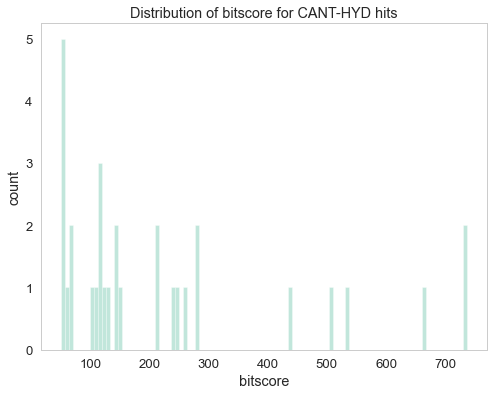

In [24]:
# plot the distribution of bitscore
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df["bitscore"], kde=False, bins=100, ax=ax)
ax.set_xlabel("bitscore")
ax.set_ylabel("count")
ax.set_title("Distribution of bitscore for CANT-HYD hits")
plt.show()

In [25]:
df.query_id.value_counts()

NNKMIP_17000    3
NNKMIP_08975    2
NNKMIP_06145    2
NNKMIP_03465    2
NNKMIP_07215    2
NNKMIP_15035    2
NNKMIP_01135    2
NNKMIP_06650    2
NNKMIP_00695    1
NNKMIP_17525    1
NNKMIP_13650    1
NNKMIP_06000    1
NNKMIP_03735    1
NNKMIP_02450    1
NNKMIP_00450    1
NNKMIP_03885    1
NNKMIP_05065    1
NNKMIP_06825    1
NNKMIP_12535    1
NNKMIP_12545    1
NNKMIP_02130    1
NNKMIP_13175    1
Name: query_id, dtype: int64

### CANT-HYD annotation of all data source

In [4]:
dpath_canthyd = "/Users/allen/github/rujinlong/phydgene/hpc/02_canthyd"
d_fins = {
    "IMGVR": "imgvr_canthyd.tsv.gz",
    "NCBIvirus": "ncbivirus_canthyd.tsv.gz",
    "PHROG_cluster": "phrog_cluster_canthyd.tsv.gz",
    "PHROG_singletons": "phrog_singletons_canthyd.tsv.gz",
    "Virome_virus": "virome_canthyd.tsv.gz",
    "Virome_all": "plass_cluster_canthyd.tsv.gz",
    "isobac": "isobac_canthyd.tsv"
    # "Isolates": "phagebac_canthyd.tsv.gz"
}

d_fins = {x: os.path.join(dpath_canthyd, y) for x, y in d_fins.items()}
d_dfs = {}
for k, v in d_fins.items():
    df_all, df_trusted, df_good = extract_canthyd_hits(v, df_canthyd_cutoffs)
    df_all["source"] = k
    df_trusted["source"] = k
    df_good["source"] = k
    d_dfs[k] = {"all": df_all, "trusted": df_trusted, "good": df_good}

# concat all dataframes
df_all = pd.concat([d_dfs[x]["all"] for x in d_dfs.keys()], ignore_index=True)

#### Stat

In [48]:
# Check which data source has trusted or good hits
for source in d_dfs.keys():
    for level in ["trusted", "good"]:
        df = d_dfs[source][level]
        if df.shape[0] > 0:
            print(source, level, df.shape[0])

IMGVR trusted 17
IMGVR good 17
isobac trusted 6
isobac good 8


#### Figure 1

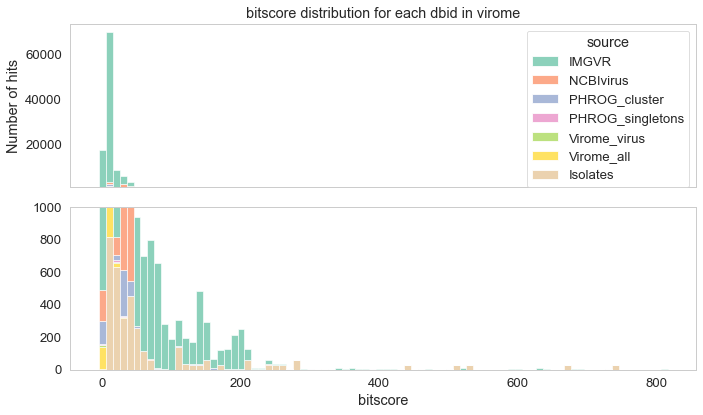

In [6]:
# Plot stacked histogram of bitscores using seaborn, bins=100
fig, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10, 6))
sns.histplot(data=df_all, ax=ax_top, binwidth=10, fill=True, legend=True, multiple="stack", hue="source", x="bitscore")
sns.histplot(data=df_all, ax=ax_bottom, binwidth=10, fill=True, legend=False, multiple="stack", hue="source", x="bitscore")

ax_top.set_ylim(bottom=1000)
ax_bottom.set_ylim(0, 1000)

ax_top.set_title('bitscore distribution for each dbid in virome')
ax_top.set_ylabel("Number of hits")
ax_bottom.set_ylabel("")
ax_bottom.set_xlabel("bitscore")
plt.tight_layout()
plt.show()

#### Isolate phage contigs

In [5]:
# extract query_id from df_phagebac and convert to list
query_ids = set(d_dfs["Isolates"]["good"]['query_id'].tolist())

# contig_id is the part of query_id before the last underscore
contig_ids = [x.rsplit('_', 1)[0] for x in query_ids]

# convert contig_ids to dataframe and save to file
df_contig_ids = pd.DataFrame(contig_ids, columns=['contig_id'])

df_contig_ids

,contig_id
0,D45s01_20
1,D45s05_16
2,D45s09_7
3,D45s13_8
4,D45s10_3
...,...
81,D45s03_13
82,MADJMMAF
83,D45s13_21
84,DMPs06_6


In [65]:
from Bio import SeqIO
from Bio.SeqUtils import GC

# GC content
wd = "/Users/allen/github/rujinlong/phydgene/hpc/00_isobac"

gc_contents = []
for fin in os.listdir(wd):
    if fin.endswith(".ffn"):
        print(fin)
        recs = list(SeqIO.parse(os.path.join(wd, fin), "fasta"))
        gc_contents += [[x.id, round(GC(x.seq), 2), len(x)] for x in recs]

df_gc = pd.DataFrame(gc_contents, columns=['query_id', 'gc_percent', 'gene_length'])

DMP.ffn
D45.ffn


In [67]:
query_ids = set(d_dfs["isobac"]["good"]['query_id'].tolist())
df_bac = pd.DataFrame([x for x in query_ids if not x.startswith('D')], columns=['query_id'])

tbl = df_bac.merge(df_all, on='query_id', how='left')
# tbl trusted_hit is True
tbl = tbl[tbl['trusted_hit'] == True]
tbl = tbl.merge(df_gc, on='query_id', how='left')

In [68]:
tbl

,query_id,dbid,Eenzyme,Broad_Enzymatic_Group,Genes,Substrate,Hydrocarbon_Group,Respiration,Trusted_Cutoff,Noise_Cutoff,...,Closely_related_genes_above_trusted_cutoff,hmm_description,evalue,bitscore,num_hsps,trusted_hit,good_hit,source,gc_percent,gene_length
0,JABKED_02130,AlkB,AlkB-type alkane hydroxylase,23 - monooxygenase,alkB,C5-C13 Alkane,alkane,aerobic,550,530,...,NaN,alkane hydrolase,2.400000e-224,736.7,1,True,True,isobac,68.07,1500
1,NNKMIP_00695,AlkB,AlkB-type alkane hydroxylase,23 - monooxygenase,alkB,C5-C13 Alkane,alkane,aerobic,550,530,...,NaN,alkane hydrolase,6.400000e-224,735.3,1,True,True,isobac,67.89,1548
2,NNKMIP_02130,AlkB,AlkB-type alkane hydroxylase,23 - monooxygenase,alkB,C5-C13 Alkane,alkane,aerobic,550,530,...,NaN,alkane hydrolase,2.400000e-224,736.7,1,True,True,isobac,68.07,1500
3,JABKED_00695,AlkB,AlkB-type alkane hydroxylase,23 - monooxygenase,alkB,C5-C13 Alkane,alkane,aerobic,550,530,...,NaN,alkane hydrolase,6.400000e-224,735.3,1,True,True,isobac,67.89,1548
4,NNKMIP_17565,CYP153,Cytochrome P450 alkane hydroxylase,43 - monooxygenase,cyp153,C5-C13 Alkane,alkane,aerobic,590,480,...,NaN,alkane oxidizing cytochrome P450,2.100000e-203,666.9,1,True,True,isobac,58.61,1341
5,JABKED_17585,CYP153,Cytochrome P450 alkane hydroxylase,43 - monooxygenase,cyp153,C5-C13 Alkane,alkane,aerobic,590,480,...,NaN,alkane oxidizing cytochrome P450,2.100000e-203,666.9,1,True,True,isobac,58.61,1341


In [64]:
tbl[["query_id", "Genes", "gc_percent", "Broad_Enzymatic_Group", "Hydrocarbon_Group", "Respiration", "hmm_description", "evalue", "bitscore"]]

# save to file
tbl.to_csv("isobac_trusted_hits.tsv", sep='\t', index=False)

In [55]:
tbl.columns

Index(['query_id', 'dbid', 'Eenzyme', 'Broad_Enzymatic_Group', 'Genes',
       'Substrate', 'Hydrocarbon_Group', 'Respiration', 'Trusted_Cutoff',
       'Noise_Cutoff', 'Seed_sequences', 'Length', 'Closest_false_positive',
       'Closely_related_genes_above_trusted_cutoff', 'hmm_description',
       'evalue', 'bitscore', 'num_hsps', 'trusted_hit', 'good_hit', 'source',
       'gc_content'],
      dtype='object')

In [10]:
tbl = d_dfs["IMGVR"]["trusted"]

# write tbl to file
tbl.to_csv("imgvr_good_hits.tsv", sep='\t', index=False)

In [12]:
tbl.to_excel("imgvr_trusted_hits.xlsx", index=False)